# Milestone 5

In [78]:
import pandas as pd

# Modeling
from sklearn.tree import DecisionTreeClassifier      # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics                          #Import scikit-learn metrics module for accuracy calculation

# Visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [52]:
df_main = pd.read_csv('Extraction/Star_Online_all_label.csv')
df_cat  = pd.read_csv('Main_cat.csv')

In [53]:
df_cat.head(2)

,key,Main_Category,Sub_Category,URL_Extension
0,0,Main Market,Health Care,main_healthcare
1,1,Main Market,Energy,main_energy


In [54]:
df_main.head(2)

,fkey,symbol,name,board,stock_code,52_week_high,52_week_low,open,high,low,last,chg,chg_pct,Vol_00,buy_Vol_00,sell_Vol_00,update,logdate,label
0,7,AHB-WB,AHB HOLDINGS BERHAD - WARRANTS B 2014/2019,Main,7315WB,0.120,0.005,0.005,0.010,0.005,0.010,0.0,0.0,"22,000","0.005 / 9,100","0.010 / 23,373",2/22/2019 19:11,2/24/2019 0:40,1
1,8,IREKA-WB,IREKA CORPORATION BERHAD-WB 14/19,Main,8834WB,0.155,0.005,0.005,0.005,0.005,0.005,0.0,0.0,800,"0.005 / 5,250","0.010 / 5,763",2/22/2019 19:11,2/24/2019 0:40,1


In [55]:
df_main_merge = df_main.merge(df_cat, how='inner', left_on = 'fkey',right_on='key')

In [56]:
df_main_merge = df_main_merge[['fkey','Main_Category','Sub_Category','symbol','name','board','stock_code','52_week_high','52_week_low','open','high','low','last','chg','chg_pct','Vol_00','buy_Vol_00','sell_Vol_00','label']]

In [58]:
#split dataset in features and target variable
feature_cols = ['fkey', 'open','high','low','last','chg','chg_pct']
X = df_main_merge[feature_cols] # Features
y = df_main_merge.label         # Target variable

In [59]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [60]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [61]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [62]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [63]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9766027140851661


In [64]:
X.head()

,fkey,open,high,low,last,chg,chg_pct
0,7,0.005,0.010,0.005,0.010,0.000,0.0
1,7,0.005,0.010,0.005,0.010,0.000,0.0
2,7,0.005,0.010,0.005,0.010,0.005,100.0
3,7,0.005,0.005,0.005,0.005,-0.005,-50.0
4,7,0.005,0.010,0.005,0.005,0.000,0.0


In [66]:
#dot_data = StringIO()
export_graphviz(clf, out_file='tree_nonlimited.dot',  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])


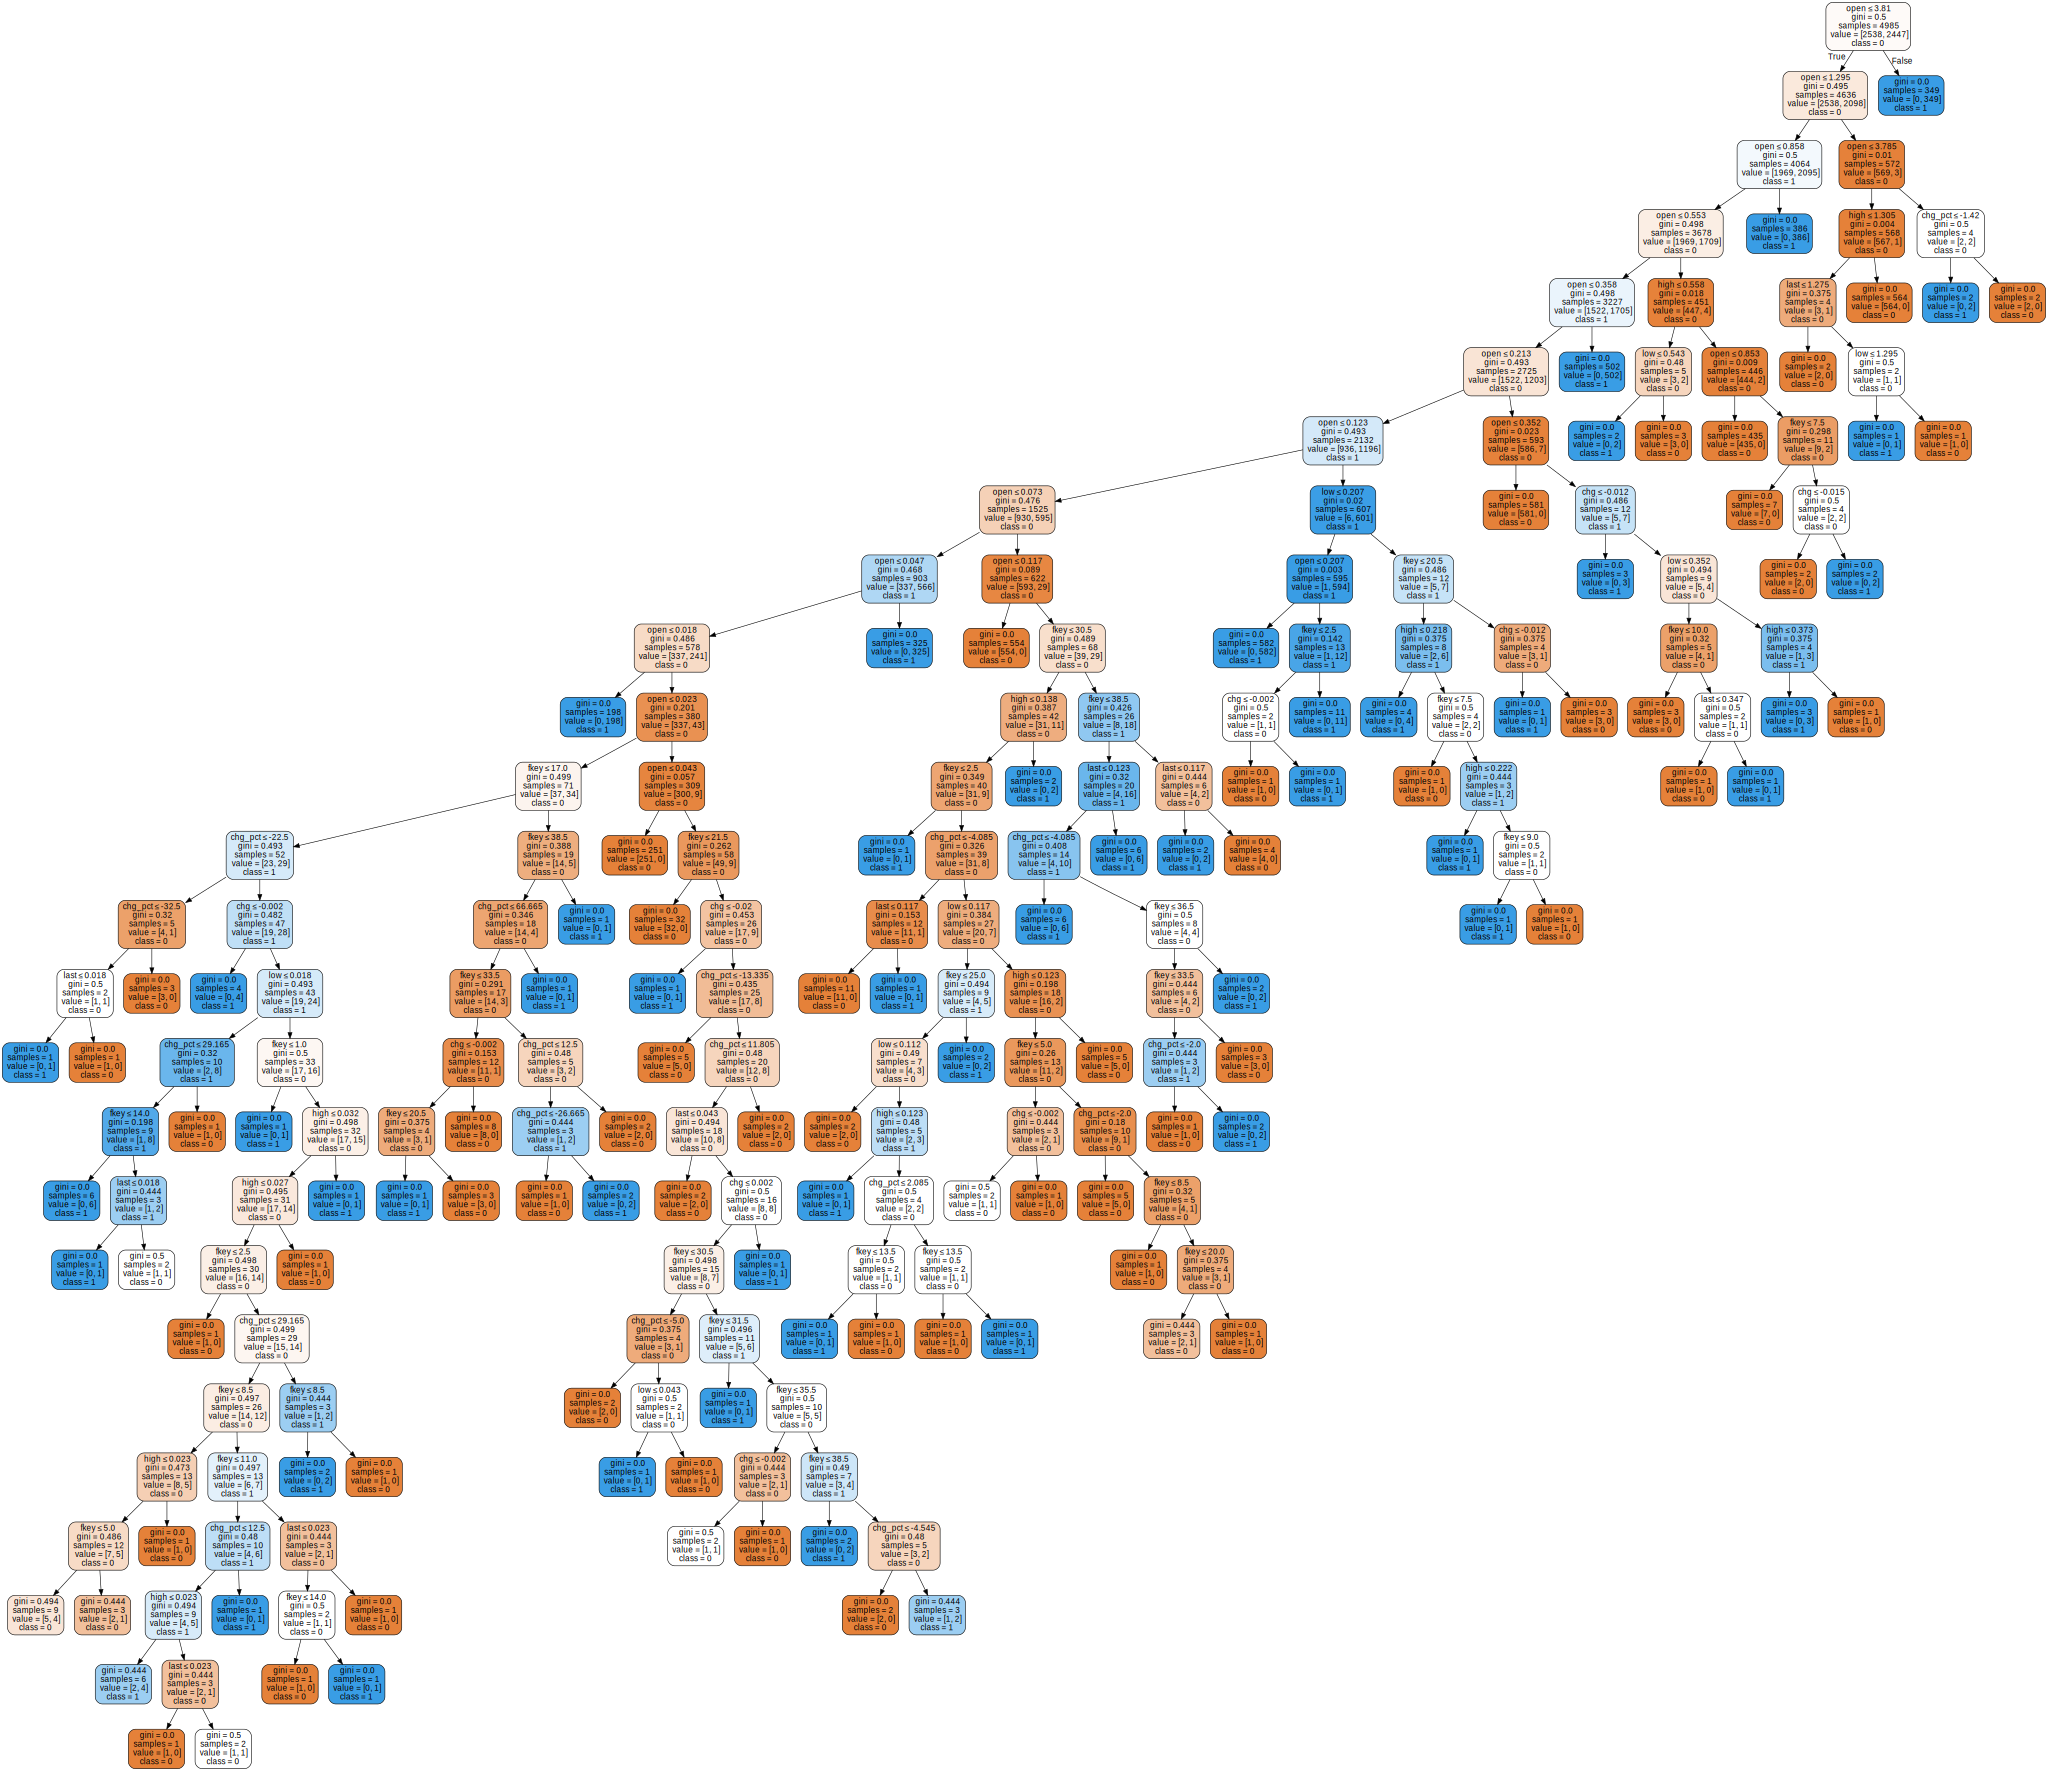

In [77]:
from subprocess import call
from IPython.display import SVG, display

call(['dot', '-Tsvg', 'tree_nonlimited.dot', '-v'],stdout=open('new_tree.svg','wb'))
display(SVG('tree.svg'))

In [16]:
#!pip install graphviz
#!pip install pydotplus

In [65]:



# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True),feature_names = feature_cols,class_names=['0','1'])

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('stock.png')
# Image(graph.create_png())

In [76]:
# #graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#!dot.exe -Tpng tree_nonlimited.dot -o tree_nonlimited.png -Gdpi=600

from subprocess import call
call(['dot', '-Tsvg', 'tree_nonlimited.dot', '-v'],stdout=open('new_tree.svg','wb'))
#call(['dot', '-Tpng', 'tree_nonlimited.dot', '-o', 'tree_nonlimited.png', '-Gdpi=600'])
#call(['dot', '-Tsvg', 'tree_nonlimited.dot', '-v', 'tree.svg'])


#!dot -Tsvg tree_nonlimited.dot -v > tree.svg


0

[Decission Tree](files:\C:\Windows\System32\cmd.exe\tree.svg)

In [73]:
from IPython.display import Image
Image(filename = 'tree.svg')

ValueError: Cannot embed the 'svg' image format

In [36]:
import os     

os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [20]:
import imp
imp.find_module('pydotplus')

(None,
 'C:\\Users\\A1916\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\pydotplus',
 ('', '', 5))